In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Sulphates = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Gypsum__R040029-3__Raman__514__0__depolarized__Raman_Data_Processed__11459.txt"
scdat = np.recfromtxt(Sulphates, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman = scdat.Raman_shift
intensity = scdat.intensity
a = np.c_[Raman, intensity]
print(len(a[:,0]))

chlorides = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Chlorargyrite__R050360__Raman__514__0__unoriented__Raman_Data_Processed__10820.txt"
scdat2 = np.recfromtxt(chlorides, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman2 = scdat2.Raman_shift
intensity2 = scdat2.intensity
a2 = np.c_[Raman2, intensity2]
print(len(a2))

Fluorite = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Fluorite__R050115-3__Raman__514__0__depolarized__Raman_Data_Processed__5427.txt"
scdat3 = np.recfromtxt(Fluorite, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman3 = scdat3.Raman_shift
intensity3 = scdat3.intensity
a3 = np.c_[Raman3, intensity3]
print(len(a3))

calcite = "https://rruff.info/tmp_rruff/Calcite__R040070-3__Raman__514__0__depolarized__Raman_Data_Processed__11617.rruff"
scdat1 = np.recfromtxt(calcite, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman1 = scdat1.Raman_shift
intensity1 = scdat1.intensity
b = np.c_[Raman1, intensity1]
print(len(b))

#Organising Raman data into a array.
d = np.c_[a[:len(a2)], a2, a3[:len(a2)] , b[:len(a2)]]
print(d)

#Defining a class for each Raman spectrum.
t = np.ones(len(a2))
t[len(a2)//4: len(a2)//2] = 2
t[len(a2)//2: 3*len(a2)//4] = 3
t[3*len(a2)//4: len(a2)] = 4
print(t)

#scaling the Raman array so the mean is 0 and the standard deviation is 1.
scaler = StandardScaler()
X = d
scaler.fit(X)
X = scaler.transform(X)
print(X)
y = t

#Making a function of kNN algorithm.
def knn(k):
    n_neighbors = k
    
# Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'red'])
    cmap_bold = ListedColormap(['yellow', 'c', 'darkblue', 'darkred'])

# we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

# Plot the decision boundary for Z array at each position on the grid.
    xx, yy = np.meshgrid(X[:,0], X[:,1])
    x1x, y1y = np.meshgrid(X[:,2], X[:,3])
    x2x, y2y = np.meshgrid(X[:,4], X[:,5])
    x3x, y3y = np.meshgrid(X[:,6], X[:,7])
    j = x3x.ravel(), y3y.ravel(),x3x.ravel(), y3y.ravel(),x3x.ravel(), y3y.ravel(),x3x.ravel(), y3y.ravel()
    Z = clf.predict(np.c_[j])

# Put the result into a color plot
    Z = Z.reshape(x3x.shape)
    plt.figure(figsize=(12,9))
    ax = plt.pcolormesh( x3x , y3y , Z , cmap=cmap_light)

# Plot the test points
    plt.scatter(X[:, 6], X[:, 7] , c=y, cmap=cmap_bold,
        edgecolor='', s=20, label = 'epsomite')
    cbar = plt.colorbar(ax)
    cbar.set_label('The class values')
    plt.title("4-Class classification, (k = %i)"
             % (k))
    plt.xlabel('Scaled Raman shift(cm-1)')
    plt.ylabel('Scaled Intensity(number of counts)')
    orange_patch = mpatches.Patch(color='orange', label= 'Sulphates data')
    cyan_patch = mpatches.Patch(color='cyan', label='Chlorides data')
    red_patch = mpatches.Patch(color='red', label='Calcite data')
    blue_patch = mpatches.Patch(color='cornflowerblue', label='Flourite data')
    plt.legend(handles=[orange_patch, cyan_patch , blue_patch, red_patch])
    plt.tight_layout()
    
#plot the prediction grid    
    plt.figure(figsize=(12,9))
    plt.imshow(Z, cmap=cmap_light, origin='lower')
    cbar = plt.colorbar(ax)
    cbar.set_label('The class values')
    plt.title("Prediction grid of the test sample, (k = %i)"
             % (k))
    plt.xlabel('The column of the grid')
    plt.ylabel('The row of the grid')
    plt.legend(handles=[orange_patch, cyan_patch , blue_patch, red_patch])
    
#This calculates the percentage of each class in the Z array.(Also the prediction percentage)    
    b1 = np.count_nonzero(Z==1)
    b2 = np.count_nonzero(Z==2)
    b3 = np.count_nonzero(Z==3)
    b4 = np.count_nonzero(Z==4)
    b5 = b1+b2+b3+b4
    Sulphates = 100*b1/b5
    print(Sulphates)
    Chlorides = 100*b2/b5
    print(Chlorides)
    Fluorite = 100*b3/b5
    print(Fluorite)
    Calcite = 100*b4/b5
    print(Calcite)
    plt.tight_layout()
    plt.show();
    return 
knn(5)
#knn(50)
#knn(500)



1124
1051
1114
1119
[[8.361400e+01 0.000000e+00 1.114730e+02 ... 0.000000e+00 9.058700e+01
  0.000000e+00]
 [8.500900e+01 2.812000e+01 1.128640e+02 ... 3.911900e+01 9.198100e+01
  2.257100e+01]
 [8.640400e+01 1.716000e+00 1.142540e+02 ... 2.756200e+01 9.337500e+01
  1.600000e-01]
 ...
 [1.432857e+03 1.507700e+02 1.456581e+03 ... 1.801809e+03 1.438795e+03
  9.051060e+02]
 [1.434045e+03 2.035640e+02 1.457766e+03 ... 2.339418e+03 1.439982e+03
  6.671940e+02]
 [1.435233e+03 2.033750e+02 1.458950e+03 ... 2.707258e+03 1.441169e+03
  4.369360e+02]]
[1. 1. 1. ... 4. 4. 4.]
[[-1.77755877 -0.16835234 -1.77748795 ... -0.51821547 -1.77754125
  -0.12855507]
 [-1.77398538 -0.15898284 -1.77391385 ... -0.51056337 -1.77396767
  -0.12150728]
 [-1.77041198 -0.16778057 -1.77034233 ... -0.51282405 -1.77039409
  -0.12850511]
 ...
 [ 1.67862788 -0.11811626  1.67869386 ... -0.16576248  1.67864551
   0.15406418]
 [ 1.68167103 -0.10052547  1.68173865 ... -0.06060044  1.68168843
   0.07977618]
 [ 1.68471418 -0.1

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

spectrum1 = "/home/d/db444/kNN model/TeamZeus_RamanSpectra/spectrum1.xy.xy"
scdat = np.recfromtxt(spectrum1, names=['Raman_shift', 'intensity'], skip_header=0)
Raman = scdat.Raman_shift
intensity = scdat.intensity
e = np.c_[Raman, intensity]
print(len(a[:,0]))


Sulphates = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Gypsum__R040029-3__Raman__514__0__depolarized__Raman_Data_Processed__11459.txt"
scdat = np.recfromtxt(Sulphates, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman = scdat.Raman_shift
intensity = scdat.intensity
a = np.c_[Raman, intensity]
print(len(a[:,0]))

chlorides = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Chlorargyrite__R050360__Raman__514__0__unoriented__Raman_Data_Processed__10820.txt"
scdat2 = np.recfromtxt(chlorides, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman2 = scdat2.Raman_shift
intensity2 = scdat2.intensity
a2 = np.c_[Raman2, intensity2]
print(len(a2))

Fluorite = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Fluorite__R050115-3__Raman__514__0__depolarized__Raman_Data_Processed__5427.txt"
scdat3 = np.recfromtxt(Fluorite, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman3 = scdat3.Raman_shift
intensity3 = scdat3.intensity
a3 = np.c_[Raman3, intensity3]
print(len(a3))

calcite = "https://rruff.info/tmp_rruff/Calcite__R040070-3__Raman__514__0__depolarized__Raman_Data_Processed__11617.rruff"
scdat1 = np.recfromtxt(calcite, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
Raman1 = scdat1.Raman_shift
intensity1 = scdat1.intensity
b = np.c_[Raman1, intensity1]
print(len(b))

#Organising Raman data into a array.
d = np.c_[a[:len(a2)], a2, a3[:len(a2)] , b[:len(a2)]]
print(d)

#Defining a class for each Raman spectrum.
t = np.ones(len(a2))
t[len(a2)//4: len(a2)//2] = 2
t[len(a2)//2: 3*len(a2)//4] = 3
t[3*len(a2)//4: len(a2)] = 4
print(t)

#scaling the Raman array so the mean is 0 and the standard deviation is 1.
scaler = StandardScaler()
X = d
scaler.fit(X)
X = scaler.transform(X)
print(X)
y = t

#Making a function of kNN algorithm.
def knn(k):
    n_neighbors = k
    
# Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'red'])
    cmap_bold = ListedColormap(['yellow', 'c', 'darkblue', 'darkred'])

# we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

# Plot the decision boundary for Z array at each position on the grid.
    xx, yy = np.meshgrid(X[:,0], X[:,1])
    x1x, y1y = np.meshgrid(X[:,2], X[:,3])
    x2x, y2y = np.meshgrid(X[:,4], X[:,5])
    x3x, y3y = np.meshgrid(X[:,6], X[:,7])
    j = x3x.ravel(), y3y.ravel(),x3x.ravel(), y3y.ravel(),x3x.ravel(), y3y.ravel(),x3x.ravel(), y3y.ravel()
    Z = clf.predict(np.c_[j])

# Put the result into a color plot
    Z = Z.reshape(x3x.shape)
    plt.figure(figsize=(12,9))
    ax = plt.pcolormesh( x3x , y3y , Z , cmap=cmap_light)

# Plot the test points
    plt.scatter(X[:, 6], X[:, 7] , c=y, cmap=cmap_bold,
        edgecolor='', s=20, label = 'epsomite')
    cbar = plt.colorbar(ax)
    cbar.set_label('The class values')
    plt.title("4-Class classification, (k = %i)"
             % (k))
    plt.xlabel('Scaled Raman shift(cm-1)')
    plt.ylabel('Scaled Intensity(number of counts)')
    orange_patch = mpatches.Patch(color='orange', label= 'Sulphates data')
    cyan_patch = mpatches.Patch(color='cyan', label='Chlorides data')
    red_patch = mpatches.Patch(color='red', label='Calcite data')
    blue_patch = mpatches.Patch(color='cornflowerblue', label='Flourite data')
    plt.legend(handles=[orange_patch, cyan_patch , blue_patch, red_patch])
    plt.tight_layout()
    
#plot the prediction grid    
    plt.figure(figsize=(12,9))
    plt.imshow(Z, cmap=cmap_light, origin='lower')
    cbar = plt.colorbar(ax)
    cbar.set_label('The class values')
    plt.title("Prediction grid of the test sample, (k = %i)"
             % (k))
    plt.xlabel('The column of the grid')
    plt.ylabel('The row of the grid')
    plt.legend(handles=[orange_patch, cyan_patch , blue_patch, red_patch])
    
#This calculates the percentage of each class in the Z array.(Also the prediction percentage)    
    b1 = np.count_nonzero(Z==1)
    b2 = np.count_nonzero(Z==2)
    b3 = np.count_nonzero(Z==3)
    b4 = np.count_nonzero(Z==4)
    b5 = b1+b2+b3+b4
    Sulphates = 100*b1/b5
    print(Sulphates)
    Chlorides = 100*b2/b5
    print(Chlorides)
    Fluorite = 100*b3/b5
    print(Fluorite)
    Calcite = 100*b4/b5
    print(Calcite)
    plt.tight_layout()
    plt.show();
    return 
knn(5)
#knn(50)
#knn(500)


1124
1124
1051
1114
1119
[[8.361400e+01 0.000000e+00 1.114730e+02 ... 0.000000e+00 9.058700e+01
  0.000000e+00]
 [8.500900e+01 2.812000e+01 1.128640e+02 ... 3.911900e+01 9.198100e+01
  2.257100e+01]
 [8.640400e+01 1.716000e+00 1.142540e+02 ... 2.756200e+01 9.337500e+01
  1.600000e-01]
 ...
 [1.432857e+03 1.507700e+02 1.456581e+03 ... 1.801809e+03 1.438795e+03
  9.051060e+02]
 [1.434045e+03 2.035640e+02 1.457766e+03 ... 2.339418e+03 1.439982e+03
  6.671940e+02]
 [1.435233e+03 2.033750e+02 1.458950e+03 ... 2.707258e+03 1.441169e+03
  4.369360e+02]]
[1. 1. 1. ... 4. 4. 4.]
[[-1.77755877 -0.16835234 -1.77748795 ... -0.51821547 -1.77754125
  -0.12855507]
 [-1.77398538 -0.15898284 -1.77391385 ... -0.51056337 -1.77396767
  -0.12150728]
 [-1.77041198 -0.16778057 -1.77034233 ... -0.51282405 -1.77039409
  -0.12850511]
 ...
 [ 1.67862788 -0.11811626  1.67869386 ... -0.16576248  1.67864551
   0.15406418]
 [ 1.68167103 -0.10052547  1.68173865 ... -0.06060044  1.68168843
   0.07977618]
 [ 1.68471418

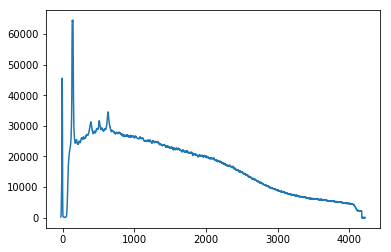

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import csv
%matplotlib inline

spectrum1 = "/home/d/db444/kNN model/TeamZeus_RamanSpectra/spectrum1.xy.xy"
scdat = np.recfromtxt(spectrum1, names=['Raman_shift', 'intensity'], skip_header=0)
Raman = scdat.Raman_shift
intensity = scdat.intensity
a = [Raman, intensity]
plt.plot(a[0], a[1])
#print(len(a[:,0]))

#scdat = np.recfromtxt(spectrum1, names=['Raman_shift', 'intensity'], skip_header=0,  delimiter=',')
#Raman = scdat.Raman_shift
#intensity = scdat.intensity
#print(spectrum1)
#a = np.c_[Raman, intensity]
#print(len(a[:,0]))